In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.modeling.models import Absorption1D
from spectacle.process.lsf import LSF
from spectacle.core.lines import Line


import numpy as np

INFO:root:Added misty to custom loaders.
INFO:root:Added my-format to custom loaders.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]

# Equivalent Width Analysis
This is an overplot of the Balmer and Lyman absorption lines.

## Balmer Series

<IPython.core.display.Javascript object>


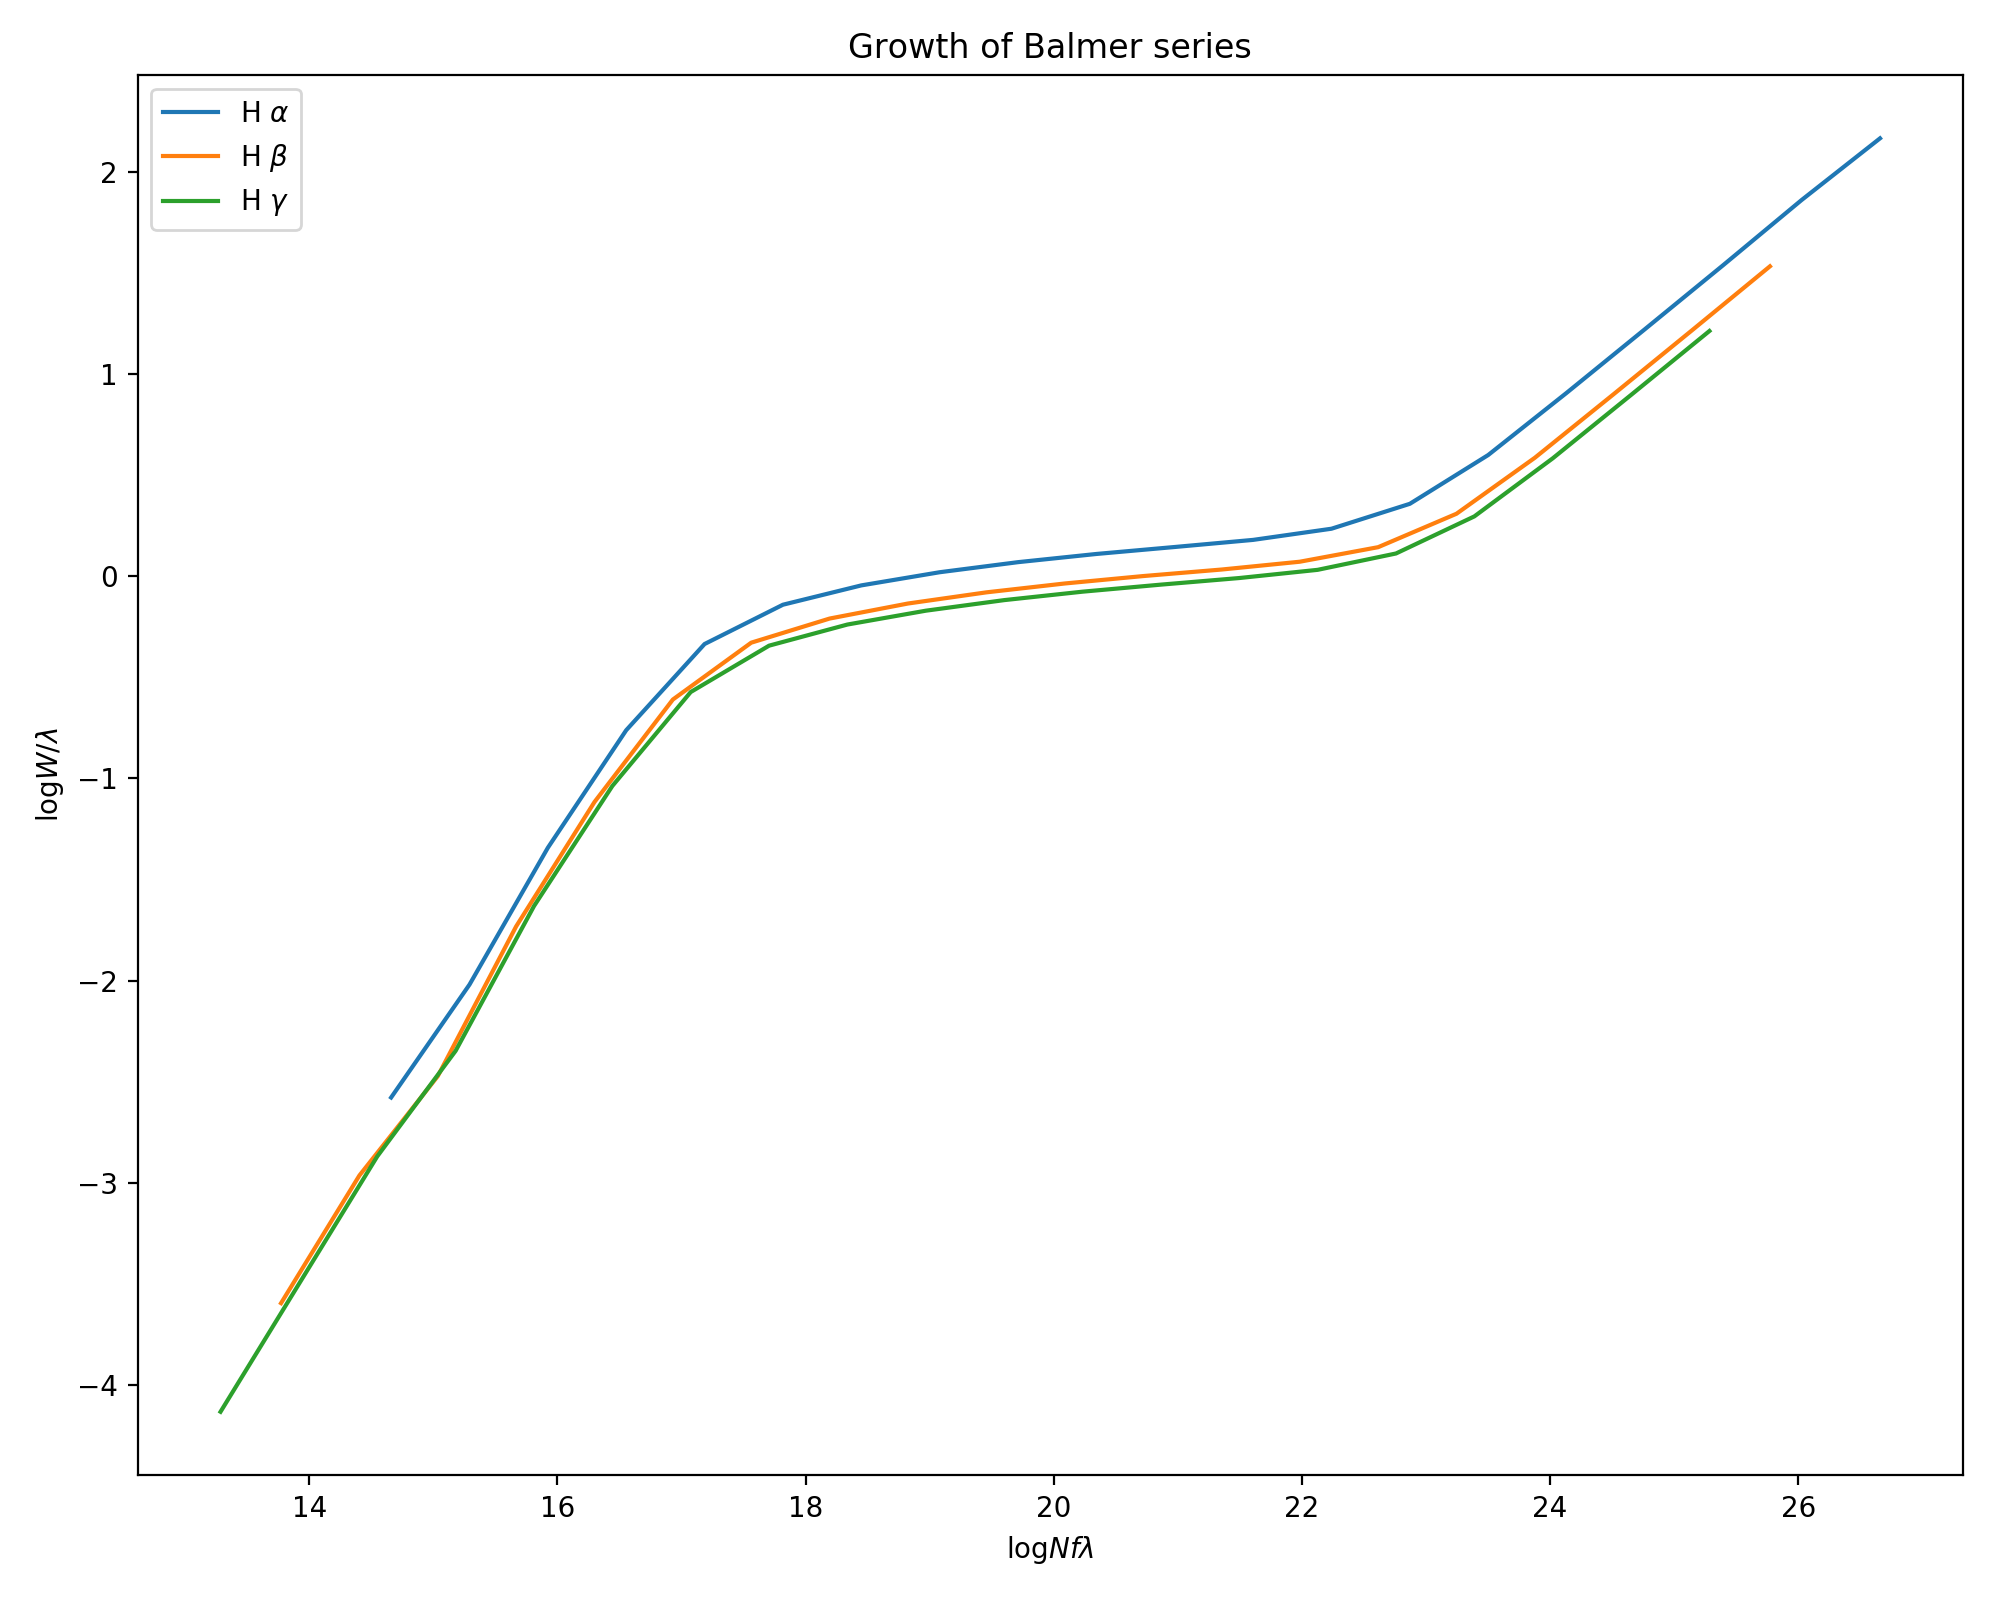

/Users/nearl/anaconda3/envs/spec_env/lib/python3.6/site-packages/astropy/units/quantity.py:966: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)
ERROR:root:No regions absorption identified; defaulting to entirebounds of spectrum.


13125 13134 13129
13122 13136 13129
13120 13138 13129
13119 13139 13129
13118 13141 13129
13116 13142 13129
13115 13143 13129
13114 13144 13129
13113 13145 13129
13112 13146 13129
13102 13156 13129
13075 13184 13129
13018 13242 13130
12901 13366 13133
12665 13628 13146


12205 14205 13205
11350 15570 13460


9914 19431 14672


7857 20000 13928


ERROR:root:No regions absorption identified; defaulting to entirebounds of spectrum.
ERROR:root:No regions absorption identified; defaulting to entirebounds of spectrum.


9723 9728 9725
9721 9730 9725
9719 9731 9725
9718 9733 9725
9717 9734 9725
9716 9734 9725
9716 9735 9725
9715 9736 9725
9714 9737 9725
9713 9738 9725
9712 9739 9725
9699 9752 9725
9672 9779 9725
9616 9837 9726
9502 9959 9730
9275 10222 9748


8837 10812 9824
8051 12279 10165


ERROR:root:No regions absorption identified; defaulting to entirebounds of spectrum.
ERROR:root:No regions absorption identified; defaulting to entirebounds of spectrum.
ERROR:root:No regions absorption identified; defaulting to entirebounds of spectrum.


8681 8686 8683
8679 8688 8683
8678 8689 8683
8677 8690 8683
8676 8691 8683
8675 8692 8683
8675 8692 8683
8674 8693 8683
8673 8694 8683
8672 8694 8683
8670 8696 8683
8658 8709 8683
8631 8737 8684
8575 8795 8685
8462

 8917 8689
8237 9181 8709
7808 9779 8793


In [3]:
f, ax = plt.subplots(1, 1)

for lam, f, name in [(6.5646230e+02, 6.9580000e-01, r"H $\alpha$"), 
                     (4.8626880e+02, 1.2180000e-01, r"H $\beta$"), 
                     (4.3416900e+02, 4.4370000e-02, r"H $\gamma$")]:
    log_n, log_w = [], []
    
    for n in np.linspace(12, 24, 20):
        # Create spectrum
        line = Line(name=name, lambda_0=lam, f_value=f, v_doppler=1e7, column_density=n)
        spectrum_model = Absorption1D(lines=[line])
        
        dispersion = np.linspace(0, 1000, 20000)
        spectrum = spectrum_model(dispersion)

        # Append values to lists
        log_n.append(np.log10(10**n * f * (lam)))
        
        ew, ew_uncert = spectrum.equivalent_width(x_0=lam)
        log_w.append(np.log10(ew))
    
    ax.plot(log_n, log_w, label=name)
    ax.set_title("Growth of Balmer series")
    
ax.set_xlabel("$\log N f \lambda$")
ax.set_ylabel("$\log W / \lambda$")

# plt.plot(spectrum1.dispersion, spectrum1.flux)
plt.legend(loc=0)
plt.tight_layout()
plt.show()

## Lyman series

<IPython.core.display.Javascript object>


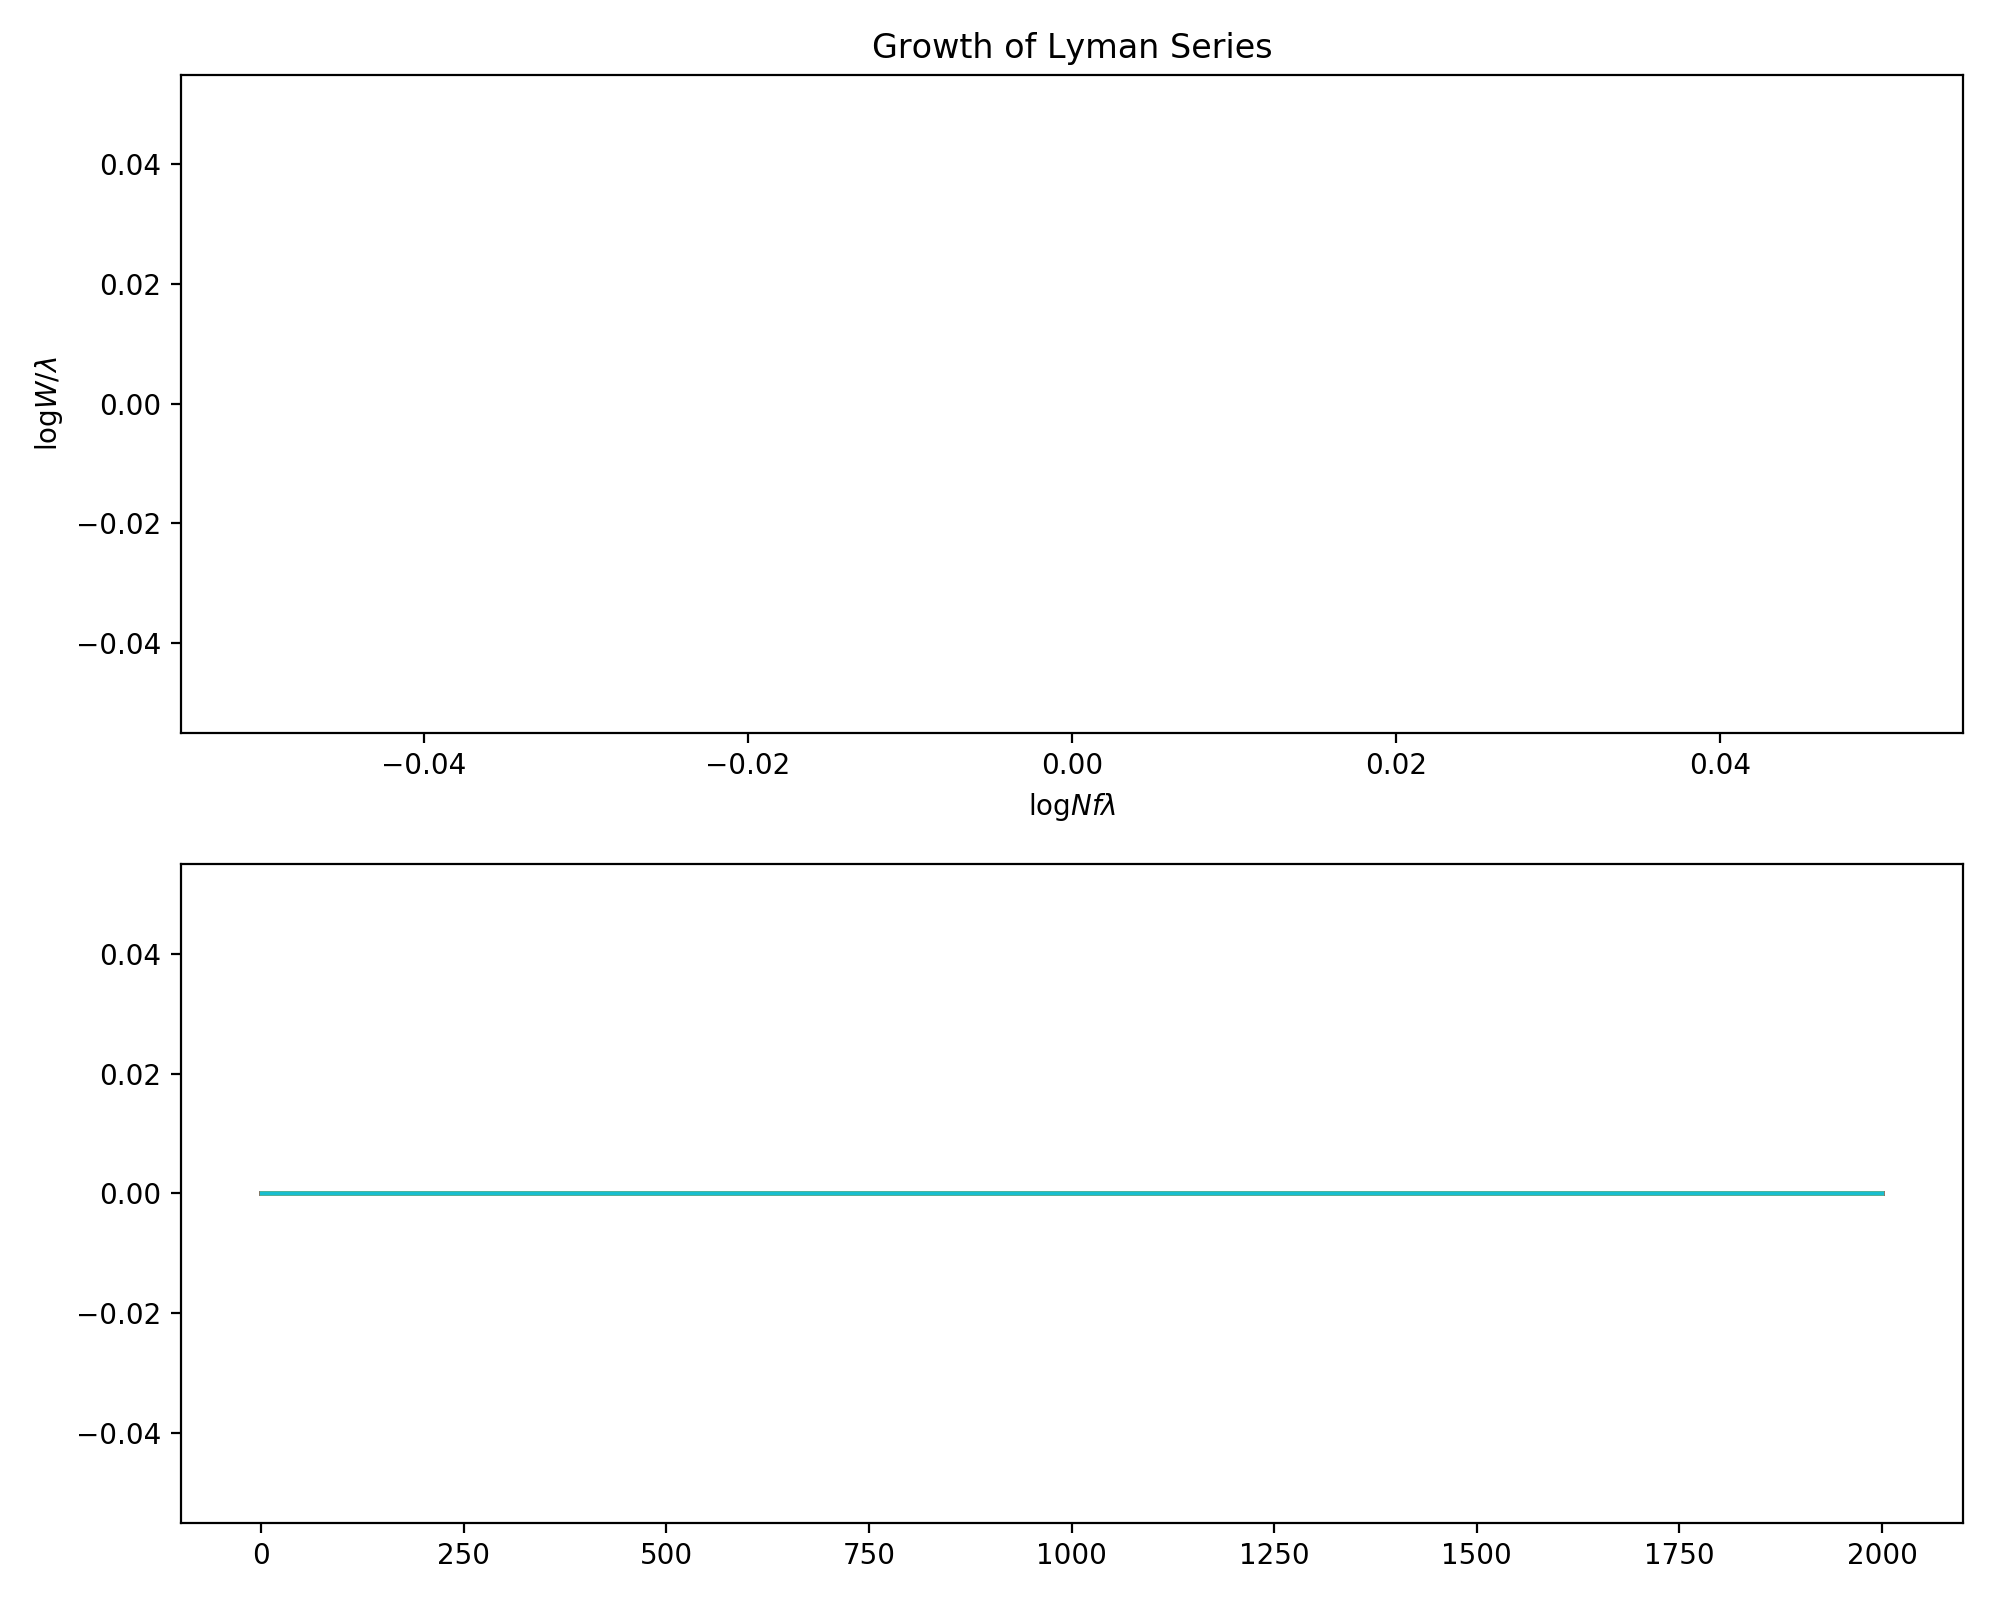

/Users/nearl/projects/spectacle/spectacle/core/profiles.py:50: RuntimeWarning: overflow encountered in power
  column_density = 10 ** column_density * u.Unit('1/cm2')
/Users/nearl/anaconda3/envs/spec_env/lib/python3.6/site-packages/astropy/units/quantity.py:966: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)
/Users/nearl/anaconda3/envs/spec_env/lib/python3.6/site-packages/astropy/units/quantity.py:939: RuntimeWarning: invalid value encountered in multiply
  return super(Quantity, self).__mul__(other)
/Users/nearl/projects/spectacle/spectacle/core/spectra.py:119: RuntimeWarning: invalid value encountered in less
  data[data < 0.0] = 0.0
/Users/nearl/projects/spectacle/spectacle/core/utils.py:23: RuntimeWarning: invalid value encountered in greater
  data[data > cap_value] = cap_value


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 

1000
0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000
0

 2000 1000
0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


0 2000 1000
0 2000 1000
0 2000 1000


/Users/nearl/anaconda3/envs/spec_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [4]:
f, (ax1, ax2) = plt.subplots(2, 1)

for lam, f, name in [(1.2156701e+03, 4.1640000e-01, r"L $\alpha$"), 
                     (1.0257223e+03, 7.9120000e-02, r"L $\beta$"), 
                     (9.7253680e+02, 2.9000000e-02, r"L $\gamma$"),
                     (9.4974310e+02, 1.3940000e-02, r"L $\delta$"),
                     (9.3780350e+02, 7.7990000e-03, r"L $\epsilon$")]:
    log_n, log_w = [], []
    
    for n in np.logspace(12, 24, 20):
        # Create spectrum
        line = Line(name=name, lambda_0=lam, f_value=f, v_doppler=1e7, column_density=n)
        spectrum_model = Absorption1D(lines=[line])
        
        dispersion = np.linspace(0, 2000, 2000)
        spectrum = spectrum_model(dispersion)

        # Append values to lists
        log_n.append(np.log10(n * f * (lam)))
        ew, ew_uncert = spectrum.equivalent_width(x_0=lam)

        log_w.append(np.log10(ew))
        
        ax2.plot(spectrum.dispersion, spectrum.data)
    
    ax1.plot(log_n, log_w, label=name)
    ax1.set_title("Growth of Lyman Series")
    
ax1.set_xlabel("$\log N f \lambda$")
ax1.set_ylabel("$\log W / \lambda$")

# plt.plot(spectrum1.dispersion, spectrum1.flux)
ax2.legend(loc=0)
plt.tight_layout()
plt.show()